# Project 3 Predicting The weight of Fish Linear Regression

## Import Library

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Set Print Options

In [2]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None
np.set_printoptions(suppress = True)

In [3]:
df = pd.read_csv(r"D:\Imarticus\ML\Supervised learning\Class Assesments(case study)- Supervised\class Assesment 3 M.L-(linear Regression)\Fish_dataset.csv")
df.shape

(159, 7)

In [4]:
df.sample(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
59,Whitefish,800.0,33.7,36.4,39.6,11.7612,6.5736
25,Bream,725.0,31.8,35.0,40.9,16.3600,6.0532
47,Roach,160.0,21.1,22.5,25.0,6.4000,3.8000
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594
98,Perch,188.0,22.6,24.6,26.2,6.7334,4.1658
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
17,Bream,700.0,30.4,33.0,38.5,14.9380,5.1975
36,Roach,69.0,16.5,18.2,20.3,5.2983,2.8217
139,Pike,770.0,44.8,48.0,51.2,7.6800,5.3760
18,Bream,610.0,30.9,33.5,38.6,15.6330,5.1338


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
df.describe(include = "object")

,Species
count,159
unique,7
top,Perch
freq,56


In [8]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

### Ploting a bar chart to see the frequency of wach species

In [9]:
sp = df["Species"].value_counts().sort_values(ascending = False)
sp = pd.DataFrame(sp)
sp.T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


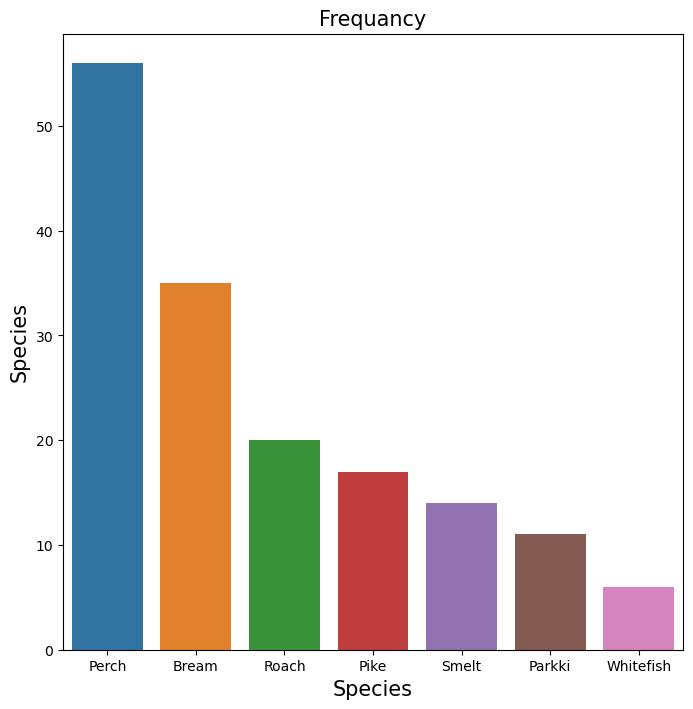

In [10]:
plt.figure(figsize = (8,8))
plt.xlabel("Species",fontsize = 15)
plt.ylabel("Count of Species",fontsize = 15)
plt.title("Frequancy",fontsize= 15)
sns.barplot(x = sp.index, y=sp.Species)
plt.show()

### Identify outliers and remove if any

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

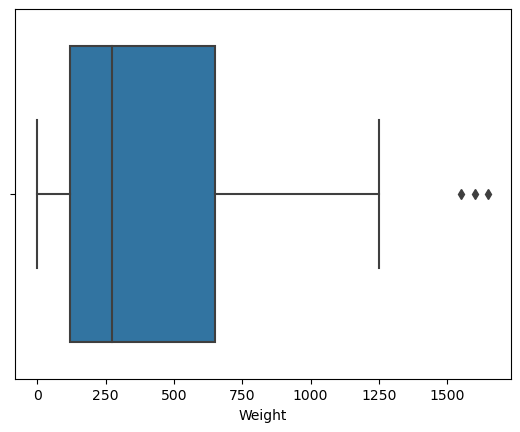

In [11]:
sns.boxplot(df["Weight"])

In [12]:
Q1 = df.Weight.quantile(0.25)
Q3 = df.Weight.quantile(0.75)
IQR = Q3-Q1

lower_cut = Q1-1.5*IQR
upper_cut = Q3+1.5*IQR

In [13]:
dfw_outliers = df[(df.Weight < lower_cut) | (df.Weight > upper_cut)]
dfw_outliers

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [14]:
def fn_bxplt(x):
    x.plot(kind = "box")
    plt.show()
    return None

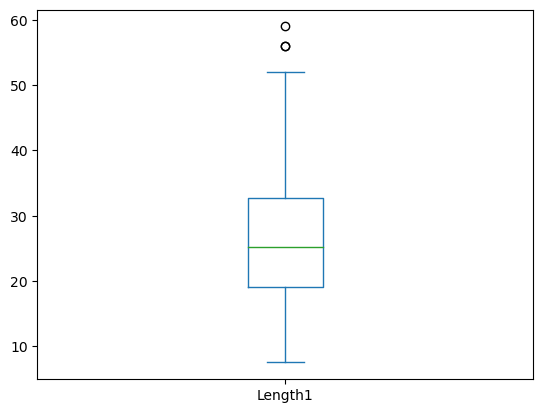

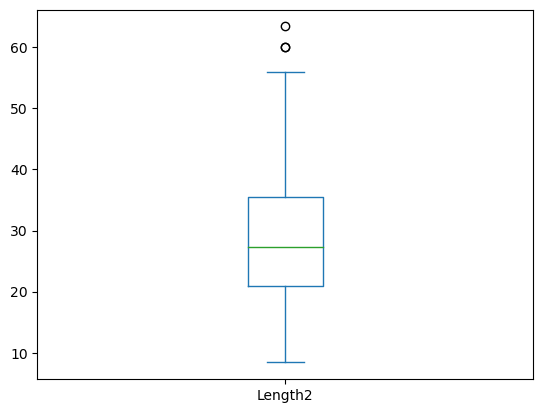

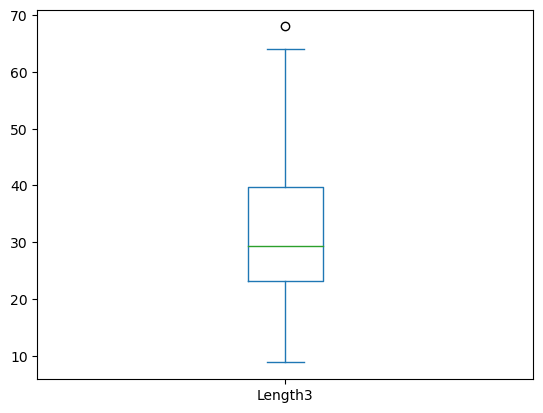

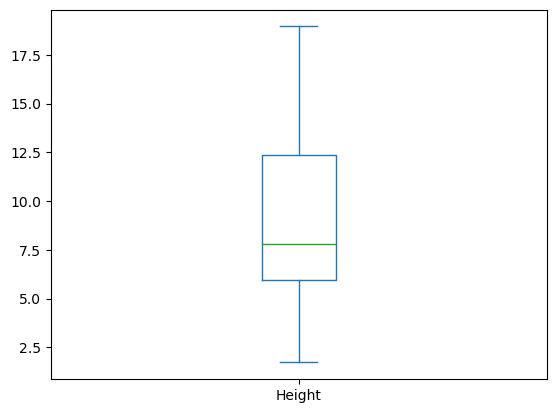

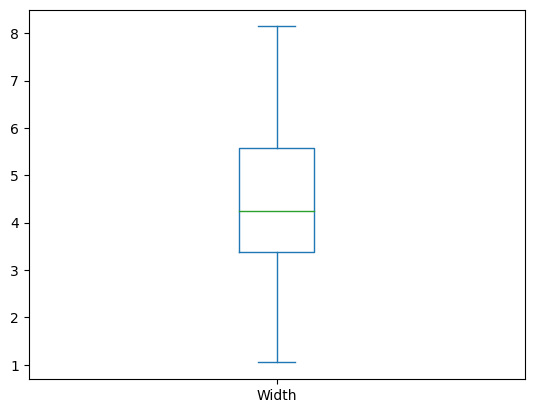

Length1    None
Length2    None
Length3    None
Height     None
Width      None
dtype: object

In [15]:
df[["Length1","Length2","Length3","Height","Width"]].apply(fn_bxplt)

In [16]:
Q1 = df.Length1.quantile(0.25)
Q3 = df.Length1.quantile(0.75)
IQR = Q3-Q1

lower_cut = Q1-1.5*IQR
upper_cut = Q3+1.5*IQR

In [17]:
dfl1_outliers = df.Length1[(df.Length1 < lower_cut) | (df.Length1 > upper_cut)]
dfl1_outliers

142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64

In [18]:
Q1 = df.Length2.quantile(0.25)
Q3 = df.Length2.quantile(0.75)
IQR = Q3-Q1

lower_cut = Q1-1.5*IQR
upper_cut = Q3+1.5*IQR

In [19]:
dfl2_outliers = df.Length2[(df.Length2 < lower_cut) | (df.Length2 > upper_cut)]
dfl2_outliers

142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64

In [20]:
Q1 = df.Length3.quantile(0.25)
Q3 = df.Length3.quantile(0.75)
IQR = Q3-Q1

lower_cut = Q1-1.5*IQR
upper_cut = Q3+1.5*IQR

In [21]:
dfl3_outliers = df.Length3[(df.Length3 < lower_cut) | (df.Length3 > upper_cut)]
dfl3_outliers

144    68.0
Name: Length3, dtype: float64

In [22]:
df1 = df.drop([143,143,144])
df1.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,383.018471,25.849045,27.991720,30.784076,8.955261,4.386982
std,333.182305,9.407407,10.094102,10.989777,4.310754,1.672783
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.000000,21.000000,23.100000,5.936400,3.375600
50%,272.000000,25.000000,27.000000,29.300000,7.680000,4.247600
75%,620.000000,32.500000,35.000000,39.500000,12.377800,5.569500
max,1600.000000,56.000000,60.000000,64.000000,18.957000,8.142000


In [23]:
df1.describe(include='object')

,Species
count,157
unique,7
top,Perch
freq,56


### Model Building

In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  157 non-null    object 
 1   Weight   157 non-null    float64
 2   Length1  157 non-null    float64
 3   Length2  157 non-null    float64
 4   Length3  157 non-null    float64
 5   Height   157 non-null    float64
 6   Width    157 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.8+ KB


In [41]:
df1["Species"].nunique()

7

In [43]:
df1_dummy = pd.get_dummies(df1, drop_first = True)

In [46]:
df1_dummy

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0
5,450.0,26.8,29.7,34.7,13.6024,4.9274,0,0,0,0,0,0
6,500.0,26.8,29.7,34.5,14.1795,5.2785,0,0,0,0,0,0
7,390.0,27.6,30.0,35.0,12.6700,4.6900,0,0,0,0,0,0
8,450.0,27.6,30.0,35.1,14.0049,4.8438,0,0,0,0,0,0
9,500.0,28.5,30.7,36.2,14.2266,4.9594,0,0,0,0,0,0


In [47]:
y = df1_dummy["Weight"]
X = df1_dummy.drop("Weight",axis = 1)

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 10)

In [49]:
print("The shape of X_train is:",X_train.shape)
print("The shape of X_test is:",X_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (125, 11)
The shape of X_test is: (32, 11)
The shape of y_train is: (125,)
The shape of y_test is: (32,)


In [50]:
X_train.head()

,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
72,7.5,8.4,8.8,2.1120,1.4080,0,1,0,0,0,0
67,19.0,20.7,23.2,9.3960,3.4104,1,0,0,0,0,0
2,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
52,24.0,26.0,29.2,8.8768,4.4968,0,0,0,1,0,0
81,18.2,20.0,21.0,5.0820,2.7720,0,1,0,0,0,0


In [51]:
y_train.head()

72      5.9
67    170.0
2     340.0
52    290.0
81     85.0
Name: Weight, dtype: float64

In [56]:
lin_reg = sm.OLS(y_train, X_train).fit()
print(lin_reg.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Weight   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              257.2
Date:                Tue, 16 Apr 2024   Prob (F-statistic):                    5.24e-75
Time:                        13:04:30   Log-Likelihood:                         -757.69
No. Observations:                 125   AIC:                                      1537.
Df Residuals:                     114   BIC:                                      1569.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [57]:
lin_reg_prediction = lin_reg.predict(X_test)

In [60]:
y_test

82      110.0
10      475.0
130     300.0
24      700.0
56      270.0
129     300.0
135     510.0
35       40.0
155      13.4
98      188.0
38       87.0
66      140.0
39      120.0
151      10.0
20      575.0
78       78.0
1       290.0
68      145.0
118     820.0
19      650.0
43      150.0
99      180.0
150       8.7
21      685.0
87      120.0
106     250.0
47      160.0
132     430.0
121    1015.0
69      200.0
120     900.0
97      145.0
Name: Weight, dtype: float64

In [58]:
lin_reg_prediction

82     103.732449
10     551.846315
130    146.735420
24     668.037108
56     337.756250
129     98.185330
135    546.990489
35    -130.120262
155     18.855704
98     249.993295
38      78.459147
66     175.682594
39     133.410263
151    -31.325948
20     638.669348
78     117.357469
1      389.903781
68     172.590938
118    818.621050
19     679.555561
43     147.414541
99     255.463600
150    -48.064240
21     665.038471
87     140.239434
106    401.220997
47     193.711873
132    455.093758
121    848.331663
69     222.433749
120    825.512408
97     226.279762
dtype: float64

In [61]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [62]:
y_pred = reg.predict(X_test)

In [63]:
y_pred

array([ 138.70099657,  530.99899923,  345.72878359,  721.66320471,
        363.95753028,  314.34236836,  553.33144051, -191.89855995,
         30.81697761,  261.95631083,   24.38844588,  180.6359976 ,
         25.09657953,    5.86017616,  646.56886541,   33.80863355,
        338.38674109,  236.70562251,  819.21990078,  595.0094073 ,
         95.47934265,  265.12830943,  -13.61563057,  653.97918956,
        164.73098801,  379.28501484,  106.54234957,  424.6132624 ,
        878.27082866,  301.39473778,  867.03031369,  235.44594505])

In [64]:
y_test

82      110.0
10      475.0
130     300.0
24      700.0
56      270.0
129     300.0
135     510.0
35       40.0
155      13.4
98      188.0
38       87.0
66      140.0
39      120.0
151      10.0
20      575.0
78       78.0
1       290.0
68      145.0
118     820.0
19      650.0
43      150.0
99      180.0
150       8.7
21      685.0
87      120.0
106     250.0
47      160.0
132     430.0
121    1015.0
69      200.0
120     900.0
97      145.0
Name: Weight, dtype: float64

In [65]:
from sklearn.model_selection import cross_val_score
cross_val_score_train = cross_val_score(reg, X_train, y_train, cv=5, scoring='r2')
print(cross_val_score_train)

[0.87126697 0.88796059 0.87484985 0.95661944 0.92984163]


In [66]:
cross_val_score_train.mean()

0.9041076996400111

In [67]:
cross_val_score_test = cross_val_score(reg, X_test, y_test, cv=5, scoring='r2')
print(cross_val_score_test)

[ 0.73195218 -0.55893901  0.97269978  0.91999175  0.89973162]


In [69]:
cross_val_score_test.mean()

0.5930872620051425

#####  Compare real and Predicted weights and give a conclusion statement

In [71]:
y_pred1= pd.DataFrame(y_pred, columns = ["Estimated Weight"])
y_pred1.head()

,Estimated Weight
0,138.700997
1,530.998999
2,345.728784
3,721.663205
4,363.957530


In [72]:
y_test1 = pd.DataFrame(y_test)
y_test1= y_test1.reset_index(drop = True)
y_test1.head()

,Weight
0,110.0
1,475.0
2,300.0
3,700.0
4,270.0


In [73]:
ynew = pd.concat([y_pred1,y_test1], axis = 1)
ynew

,Estimated Weight,Weight
0,138.700997,110.0
1,530.998999,475.0
2,345.728784,300.0
3,721.663205,700.0
4,363.957530,270.0
5,314.342368,300.0
6,553.331441,510.0
7,-191.898560,40.0
8,30.816978,13.4
9,261.956311,188.0


Conclusion Statement : From the results above, one can see there is a tendency towards erroneous estimations when the weight is small

Confidence Interval (CI)
The confidence interval is a range of values that's likely to include a population value with a certain degree of confidence. It is often expressed as a % whereby a population mean lies between an upper and lower interval. The 95% CI is a range of values that you can be 95% confident contains the true mean of the population. Accordingly, there is 5% chance that the population mean lies outside of the upper and lower confidence interval.